In [20]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [21]:
"""" Affichage brut des positions et des requêtes clients """

### Bibliothèques ###
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import imp_files as imp

In [22]:
# Listes des noeuds et clients importées des fichiers csv
N = imp.N
R = imp.R

In [23]:
N,R

([['1', 34, 10],
  ['2', 86, 39],
  ['3', 24, 42],
  ['4', 51, 56],
  ['5', 93, 15],
  ['6', 72, 62],
  ['7', 8, 80],
  ['8', 46, 40],
  ['9', 8, 3],
  ['10', 14, 11]],
 [['1', '6', '4', 19, 46, 53],
  ['2', '5', '7', 6, 69, 95],
  ['3', '9', '6', 25, 82, 88],
  ['4', '7', '2', 18, 28, 90],
  ['5', '9', '2', 9, 43, 95],
  ['6', '4', '9', 16, 83, 84],
  ['7', '4', '8', 15, 89, 90],
  ['8', '5', '4', 12, 34, 60],
  ['9', '3', '2', 21, 78, 87],
  ['10', '1', '9', 10, 41, 55],
  ['11', '2', '3', 7, 78, 86],
  ['12', '8', '1', 26, 65, 91],
  ['13', '2', '5', 29, 14, 38],
  ['14', '1', '7', 22, 13, 66],
  ['15', '8', '3', 9, 41, 65],
  ['16', '7', '4', 8, 80, 92],
  ['17', '8', '10', 3, 49, 50],
  ['18', '10', '2', 8, 6, 20],
  ['19', '9', '6', 15, 14, 18],
  ['20', '6', '10', 10, 40, 87]])

In [24]:
# Création du graphe
G = nx.DiGraph()

for x in N: # ajout des noeuds au graphe
    G.add_node(x[0], pos=(x[1], x[2]))

edge_labels = {}
for y in R: # ajout des arcs au graphe
    edge_labels[(y[1], y[2])] = y[0] # ajout des labels des arcs pour le plot
    G.add_edge(y[1], y[2], weight=y[3])

# Définitions des couleurs, des poids et des labels

edge_colors = range(2, max(R, key=lambda x: x[3])[3])

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

node_labels = {}
for node in G.nodes():
    node_labels[node] = str(node)

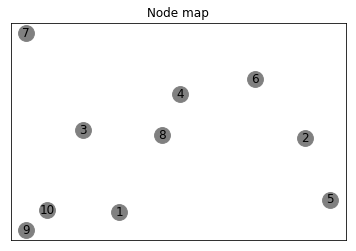

In [25]:
### Affichage du graphe ###

fig, ax = plt.subplots()
ax.set_title('Node map')
pos = nx.get_node_attributes(G, 'pos')

# affichage des noeuds
nodes_draw = nx.draw_networkx_nodes(G,pos, node_size=250, node_color="grey")
node_labels_draw = nx.draw_networkx_labels(G, pos, labels = node_labels)

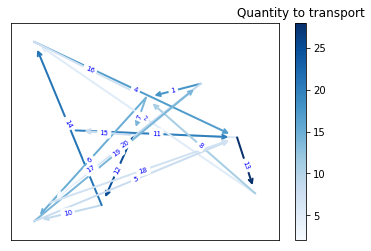

In [18]:
# affichage des arcs
edges_draw = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
edge_labels_draw = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, font_color='blue')

# légende de la barre de couleurs
pc = mpl.collections.PatchCollection(edges_draw, cmap=plt.cm.Blues)
pc.set_array(edge_colors)

cb = plt.colorbar(pc)
cb.ax.set_title('Quantity to transport')

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis('on')
plt.show()